# Summer Internship Project APSSDC 2023-2024

## Air Quality in Hyderabad: Pollution Analysis
#### from past 6 years


As with any large city, the main cause of pollution within the city centre is vehicles. Sulphur dioxide (SO2), nitrogen oxides (NOx), carbon monoxide (CO) and carbon dioxide (CO2) were the main chemicals discovered in the air. Particulate matter was also recorded in four measurable sizes PM2.5. PM10, black carbon (BC) and organic carbon (OC). These findings came from many sources including the central pollution control board, state pollution control board and the census bureau to name but a few.
The burning of organic matter, such as straw, in the surrounding rural areas also contributes to the poor air quality as does the use of biomass stoves in households. These stoves have been the traditional way of cooking for generations and as such will prove a difficult habit to break. Household rubbish or garbage is often burnt as a way of disposing of it. Some religions encourage ceremonious burning of items too.

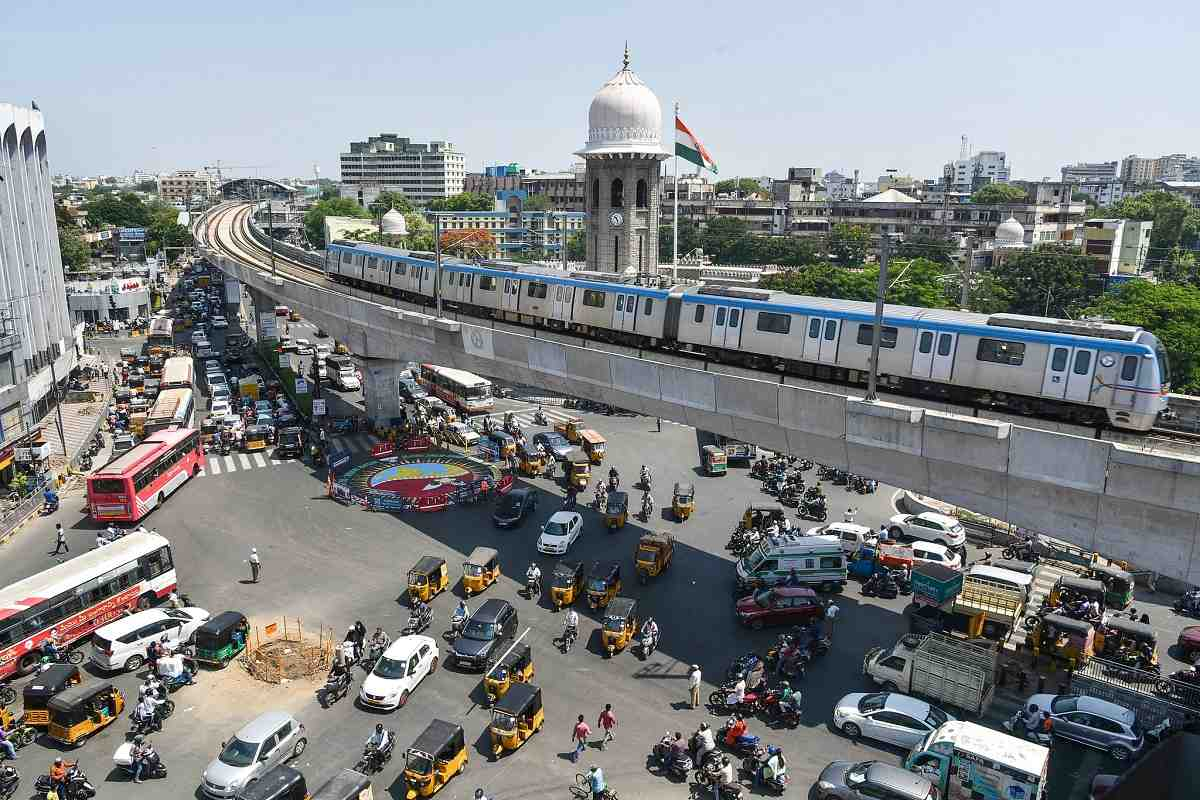

In [1]:
import requests
from bs4 import BeautifulSoup
import mysql.connector 
obj=mysql.connector.connect(host="localhost",user="root",passwd="saiisking1",database="AQI")
a=obj.cursor()

def get_aqi():
    url = 'https://aqicn.org/city/india/hyderabad/central-university/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    aqi_element = soup.find('div', {'class': 'aqivalue'})

    if aqi_element:
        aqi = aqi_element.text.strip()
        level = get_aqi_level(int(aqi))
        print(f"Current AQI in Hyderabad: {aqi} ({level})") 
        query = "insert into aqi (aqi, level)  values  (%s, %s)"
        values = (aqi, level)
        a.execute(query, values)
        obj.commit()
        print("AQI data stored in AQI Database")
       
       
    else:
        print("Unable to retrieve AQI data.")

def get_aqi_level(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

    
if __name__ == "__main__" :
    
    get_aqi()



Current AQI in Hyderabad: 69 (Moderate)
AQI data stored in AQI Database


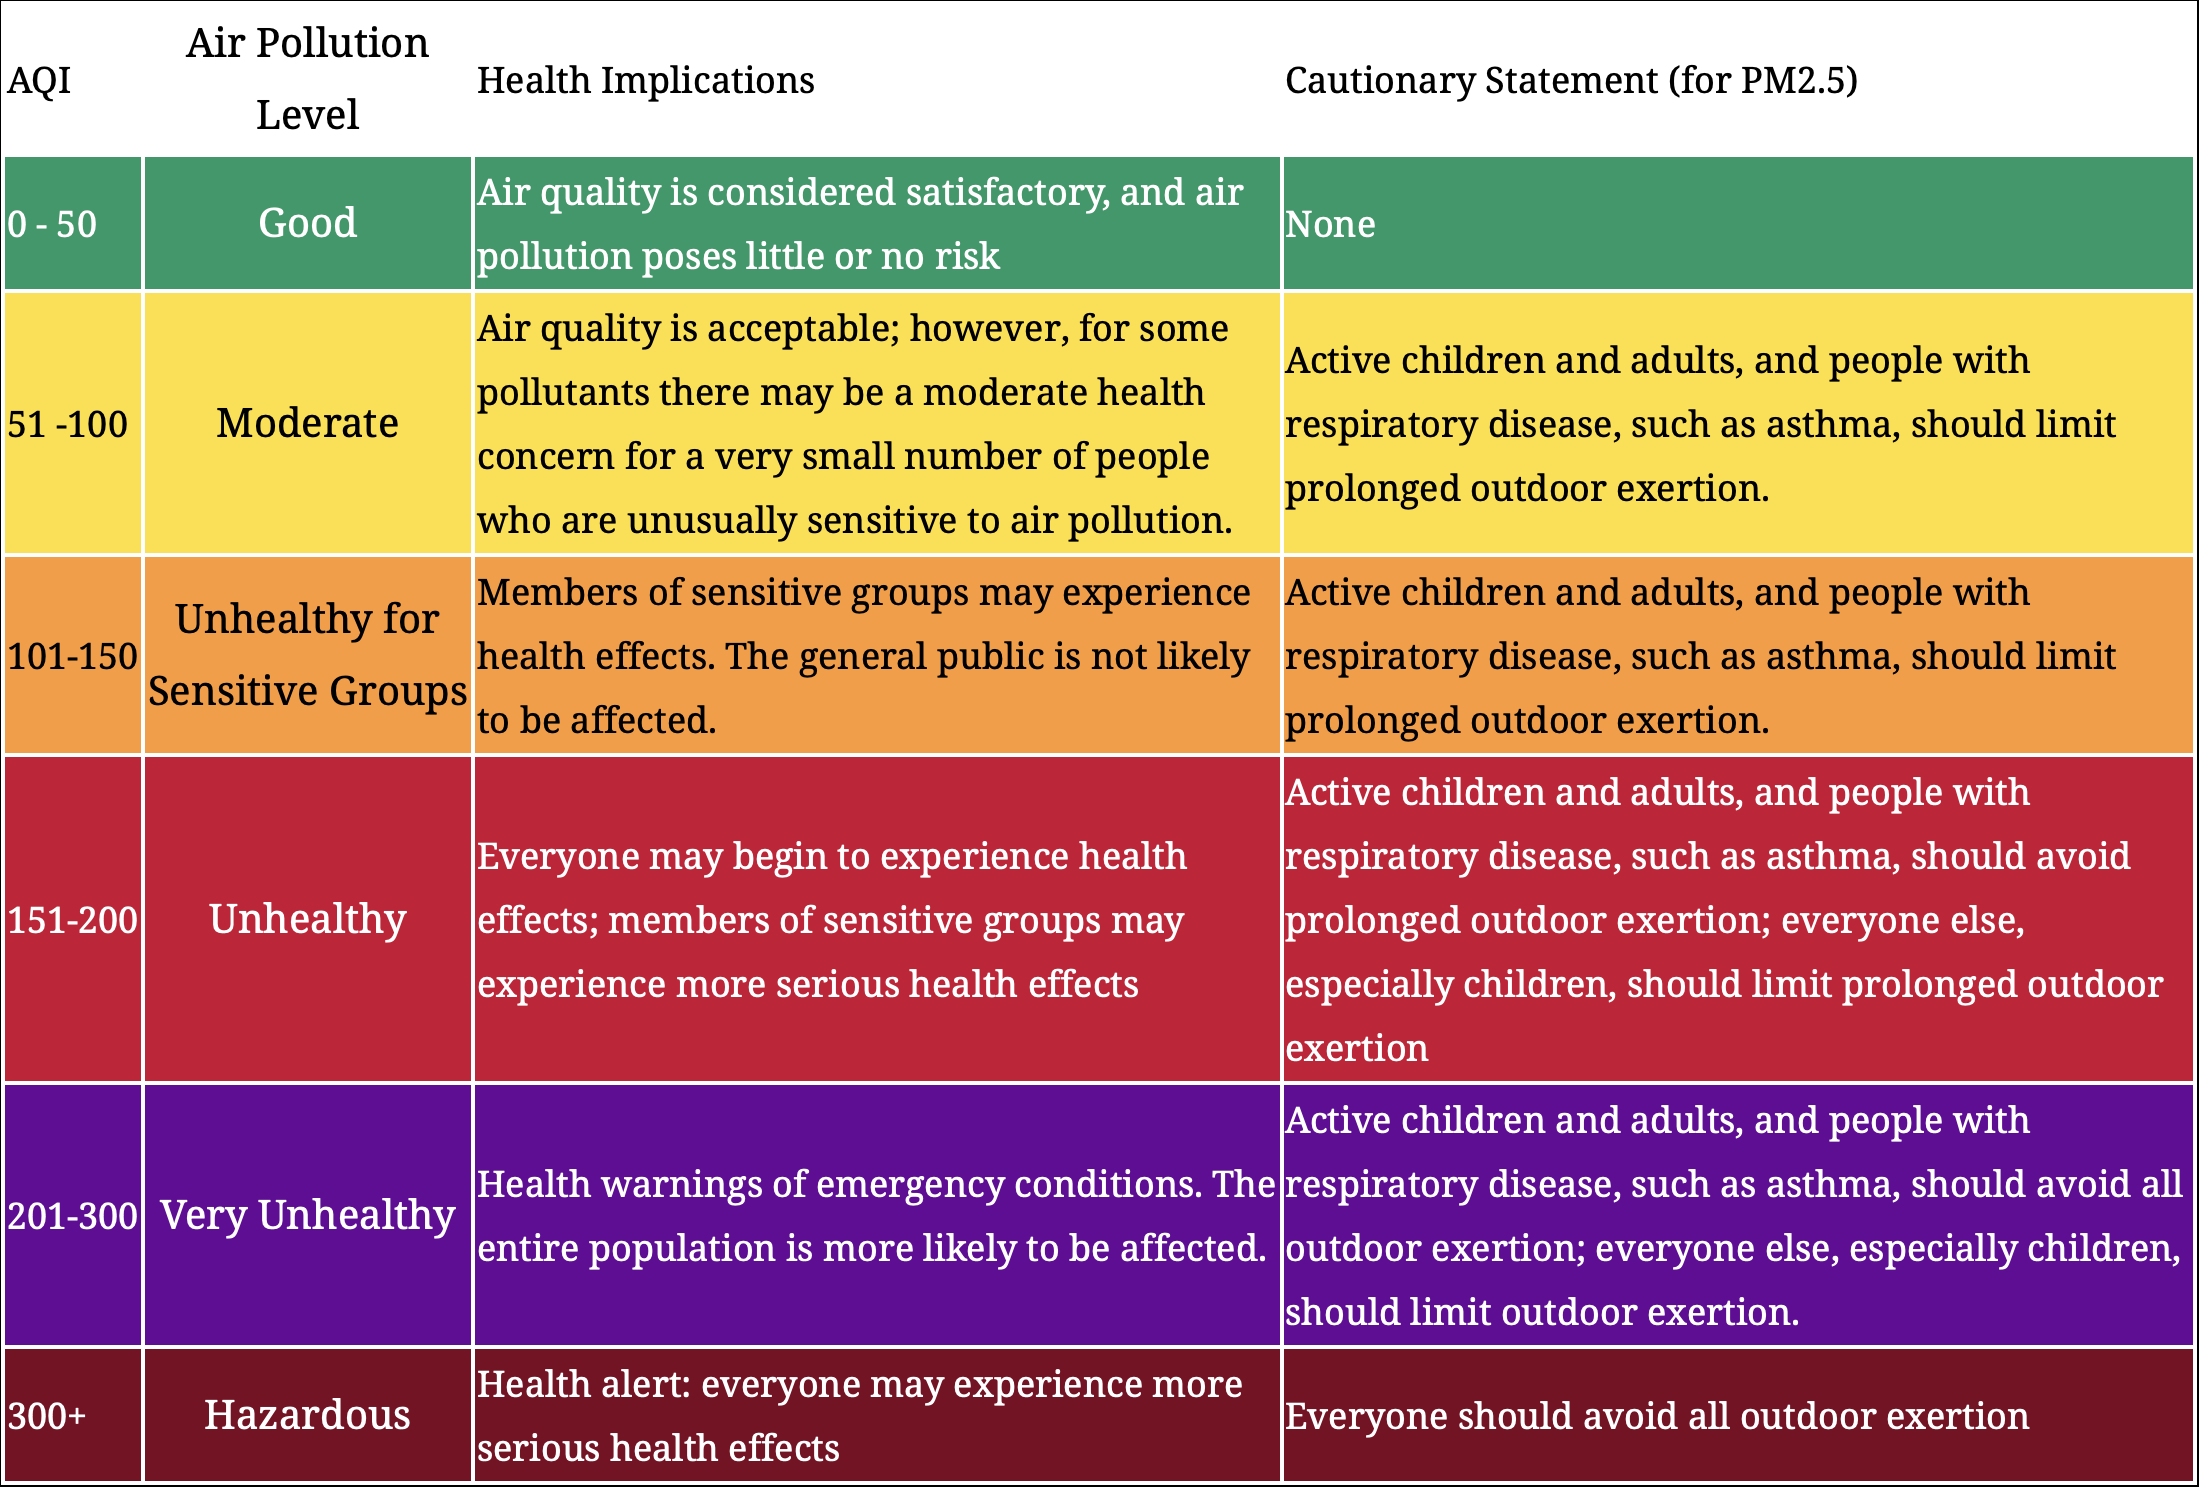

# About Dataset (Overview)
 The dataset contains 72 rows and 11 columns, offering a comprehensive view of air quality in Hyderabad City. It includes data on pollutants such as PM10, SO2, NOx, PM2.5, Ammonia, O3, CO, Benzene, and AQI. The dataset's historical data enables the observation of seasonal variations and potential correlations, aiding in understanding air quality dynamics. Researchers and stakeholders can leverage this dataset to make informed decisions and implement targeted pollution reduction strategies for a greener future in Hyderabad City.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("/Users/saikarthik/Desktop/AQI/data.csv")

In [4]:
data.shape

(72, 11)

In [5]:
data.size

792

In [6]:
data.head(6)

,Id,Months,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,1,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,2,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0
2,3,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0
3,4,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0
4,5,May-17,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN
5,6,Jun-17,NaN,35.5,21.2,25,26.0,38.8,0.3,0.6,NaN


In [7]:
data.tail(6)

,Id,Months,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
66,67,Jul-22,76.0,9.3,30.3,23,26.0,15.7,0.69,0.03,58.0
67,68,Aug-22,89.0,12.0,35.0,22,26.0,15.2,0.64,0.09,67.0
68,69,Sep-22,92.0,13.0,37.3,30,31.0,10.0,0.70,0.06,76.0
69,70,Oct-22,93.0,12.0,30.7,46,28.0,9.7,0.67,0.07,101.0
70,71,Nov-22,87.0,10.4,28.2,78,30.0,12.1,1.52,0.03,166.0
71,72,Dec-22,88.0,13.0,34.5,72,15.0,16.5,1.39,0.04,162.0


This datase contains air quality index from Jan 17 to Dec 22. It contain data of past 6 years.


In [8]:
data.dtypes

Id                           int64
Months                      object
PM10 in æg/m3              float64
SO2 in æg/m3               float64
NOx  in æg/m3              float64
 PM2.5  in æg/m3             int64
Ammonia - NH3  in æg/m3    float64
O3   in æg/m3              float64
CO  in mg/m3               float64
 Benzene  in æg/m3         float64
AQI                        float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       72 non-null     int64  
 1   Months                   72 non-null     object 
 2   PM10 in æg/m3            66 non-null     float64
 3   SO2 in æg/m3             71 non-null     float64
 4   NOx  in æg/m3            70 non-null     float64
 5    PM2.5  in æg/m3         72 non-null     int64  
 6   Ammonia - NH3  in æg/m3  72 non-null     float64
 7   O3   in æg/m3            72 non-null     float64
 8   CO  in mg/m3             72 non-null     float64
 9    Benzene  in æg/m3       72 non-null     float64
 10  AQI                      67 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 6.3+ KB


In [10]:
data.drop(["Id"],axis=1).describe(include="all")


,Months,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
count,72,66.000000,71.000000,70.000000,72.000000,72.000000,72.000000,72.000000,72.00000,67.000000
unique,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jan-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,109.393939,16.650704,30.171429,46.722222,23.997222,27.790278,0.549722,0.22500,105.571642
std,NaN,25.271376,9.783746,4.150088,20.224251,5.824450,22.585906,0.238764,0.19307,22.762574
min,NaN,76.000000,4.000000,18.400000,12.000000,11.000000,2.400000,0.200000,0.00000,58.000000
25%,NaN,90.000000,9.900000,28.025000,27.000000,20.000000,12.475000,0.400000,0.10000,91.300000
50%,NaN,104.000000,14.000000,29.700000,47.000000,23.000000,20.750000,0.500000,0.20000,103.500000
75%,NaN,128.000000,19.200000,32.550000,63.000000,28.000000,35.550000,0.647500,0.30000,119.500000


In [11]:
data.Months.unique()

array(['Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17',
       'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17',
       'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18',
       'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18',
       'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19',
       'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19',
       'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20',
       'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20',
       'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21',
       'Jul-21', 'Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21',
       'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22'],
      dtype=object)

# Data Cleaning 

In [12]:
print(data.duplicated()=="True")


0     False
1     False
2     False
3     False
4     False
      ...  
67    False
68    False
69    False
70    False
71    False
Length: 72, dtype: bool


In [13]:
data.drop_duplicates(inplace = True)


In [14]:
data.isnull()


,Id,Months,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
67,False,False,False,False,False,False,False,False,False,False,False
68,False,False,False,False,False,False,False,False,False,False,False
69,False,False,False,False,False,False,False,False,False,False,False
70,False,False,False,False,False,False,False,False,False,False,False


In [15]:
data.isnull().sum()


Id                         0
Months                     0
PM10 in æg/m3              6
SO2 in æg/m3               1
NOx  in æg/m3              2
 PM2.5  in æg/m3           0
Ammonia - NH3  in æg/m3    0
O3   in æg/m3              0
CO  in mg/m3               0
 Benzene  in æg/m3         0
AQI                        5
dtype: int64

In [16]:
data[data.isnull().any(axis=1)]


,Id,Months,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
4,5,May-17,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN
5,6,Jun-17,NaN,35.5,21.2,25,26.0,38.8,0.3,0.6,NaN
10,11,Nov-17,NaN,22.1,29.7,50,17.0,57.4,0.5,0.2,NaN
11,12,Dec-17,NaN,13.1,38.5,72,19.0,63.5,0.8,0.3,NaN
12,13,Jan-18,NaN,NaN,NaN,75,26.0,71.7,0.8,0.4,156.0
39,40,Apr-20,NaN,7.7,NaN,27,23.0,26.4,0.3,0.1,NaN


In [17]:
x=data["PM10 in æg/m3"].mean()
data["PM10 in æg/m3"].fillna(x,inplace=True )

In [18]:
y=data["SO2 in æg/m3"].mean()
data["SO2 in æg/m3"].fillna(y,inplace=True )

In [19]:
z=data["NOx  in æg/m3"].mean()
data["NOx  in æg/m3"].fillna(z,inplace=True )

In [20]:
y=data["AQI"].mean()
data["AQI"].fillna(y,inplace=True )

In [21]:
data.isnull().sum()


Id                         0
Months                     0
PM10 in æg/m3              0
SO2 in æg/m3               0
NOx  in æg/m3              0
 PM2.5  in æg/m3           0
Ammonia - NH3  in æg/m3    0
O3   in æg/m3              0
CO  in mg/m3               0
 Benzene  in æg/m3         0
AQI                        0
dtype: int64

# Data Transformation


In [22]:
data = data.drop("Id", axis = 1)

In [23]:
data.columns = ['months', 'pm10', 'so2', 'nox', 'pm25', 'ammonia', 'o3', 'co', 'benzene', 'AQI']


In [24]:
data.head()


,months,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI
0,Jan-17,174.000000,26.4,35.0,79,25.0,107.6,0.9,0.7,149.000000
1,Feb-17,143.000000,35.1,40.3,75,31.0,103.0,0.9,0.9,129.000000
2,Mar-17,142.000000,32.1,30.9,59,26.0,80.7,0.8,0.5,128.000000
3,Apr-17,117.000000,50.9,36.3,75,36.0,79.5,0.9,0.7,111.000000
4,May-17,109.393939,41.6,25.2,53,28.0,70.0,0.5,0.5,105.571642


In [25]:
data[['month', 'year']] = data['months'].str.split("-", expand = True)


In [26]:
data.head()


,months,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI,month,year
0,Jan-17,174.000000,26.4,35.0,79,25.0,107.6,0.9,0.7,149.000000,Jan,17
1,Feb-17,143.000000,35.1,40.3,75,31.0,103.0,0.9,0.9,129.000000,Feb,17
2,Mar-17,142.000000,32.1,30.9,59,26.0,80.7,0.8,0.5,128.000000,Mar,17
3,Apr-17,117.000000,50.9,36.3,75,36.0,79.5,0.9,0.7,111.000000,Apr,17
4,May-17,109.393939,41.6,25.2,53,28.0,70.0,0.5,0.5,105.571642,May,17


In [27]:
month = {'Jan': "1", 'Feb':'2', "Mar": '3', "Apr": '4', "May": '5', "Jun":"6", "Jul": "7", "Aug": "8", "Sep": "9", "Oct":"10", "Nov":"11", "Dec":"12"}
data['month'] = data['month'].map(month)

In [28]:
data['year'] = 2000 + data['year'].astype('int')
data['month'] = data['month'].astype('int')

In [29]:
new_data = data[['month', 'year', 'pm10', 'so2', 'nox', 'pm25', 'ammonia', 'o3', 'co', 'benzene', 'AQI']].copy()

In [30]:
new_data.head()


,month,year,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI
0,1,2017,174.000000,26.4,35.0,79,25.0,107.6,0.9,0.7,149.000000
1,2,2017,143.000000,35.1,40.3,75,31.0,103.0,0.9,0.9,129.000000
2,3,2017,142.000000,32.1,30.9,59,26.0,80.7,0.8,0.5,128.000000
3,4,2017,117.000000,50.9,36.3,75,36.0,79.5,0.9,0.7,111.000000
4,5,2017,109.393939,41.6,25.2,53,28.0,70.0,0.5,0.5,105.571642


In [31]:
data=new_data.copy()

In [32]:
data

,month,year,pm10,so2,nox,pm25,ammonia,o3,co,benzene,AQI
0,1,2017,174.000000,26.4,35.0,79,25.0,107.6,0.90,0.70,149.000000
1,2,2017,143.000000,35.1,40.3,75,31.0,103.0,0.90,0.90,129.000000
2,3,2017,142.000000,32.1,30.9,59,26.0,80.7,0.80,0.50,128.000000
3,4,2017,117.000000,50.9,36.3,75,36.0,79.5,0.90,0.70,111.000000
4,5,2017,109.393939,41.6,25.2,53,28.0,70.0,0.50,0.50,105.571642
...,...,...,...,...,...,...,...,...,...,...,...
67,8,2022,89.000000,12.0,35.0,22,26.0,15.2,0.64,0.09,67.000000
68,9,2022,92.000000,13.0,37.3,30,31.0,10.0,0.70,0.06,76.000000
69,10,2022,93.000000,12.0,30.7,46,28.0,9.7,0.67,0.07,101.000000
70,11,2022,87.000000,10.4,28.2,78,30.0,12.1,1.52,0.03,166.000000


In [33]:
data.set_index("year",inplace=True)


# Exploratory Data Analysis 

## Numerical features analysis

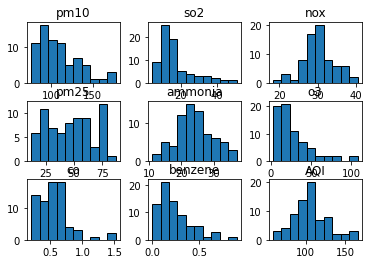

In [101]:

d.hist(bins=10, edgecolor='black', grid=False)
plt.show()

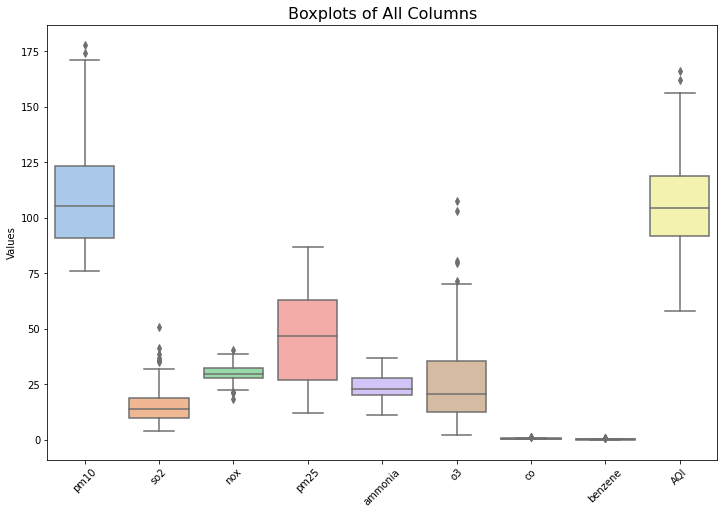

In [77]:
plt.figure(figsize=(12, 8))  
sns.boxplot(data=d, palette='pastel', orient='v')
plt.title("Boxplots", fontsize=16)
plt.ylabel("Values")
plt.xticks(rotation=45)  
plt.show()

<AxesSubplot:xlabel='pm10', ylabel='Density'>

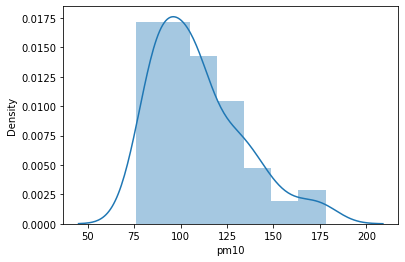

In [34]:
sns.distplot(data["pm10"])


<AxesSubplot:xlabel='so2', ylabel='Density'>

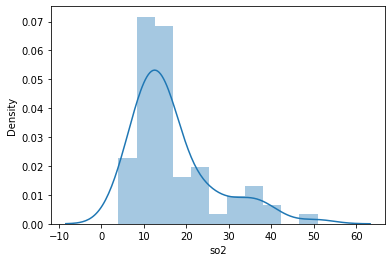

In [35]:
sns.distplot(data["so2"])


<AxesSubplot:xlabel='pm25', ylabel='Density'>

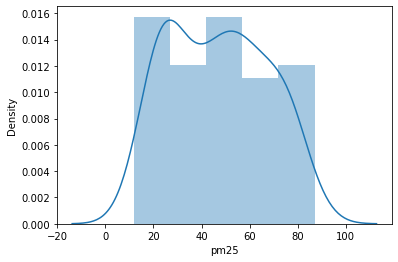

In [36]:
sns.distplot(data["pm25"])


<AxesSubplot:xlabel='nox', ylabel='Density'>

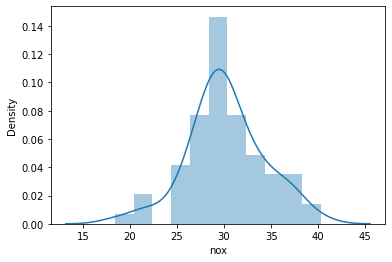

In [37]:
sns.distplot(data["nox"])


<AxesSubplot:xlabel='ammonia', ylabel='Density'>

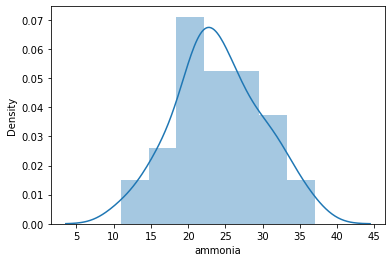

In [38]:
sns.distplot(data["ammonia"])


<AxesSubplot:xlabel='o3', ylabel='Density'>

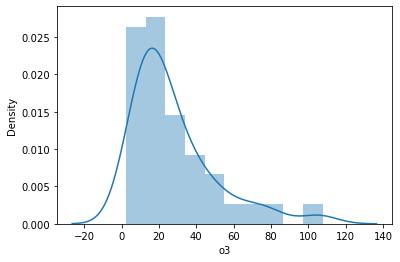

In [39]:
sns.distplot(data["o3"])


<AxesSubplot:xlabel='co', ylabel='Density'>

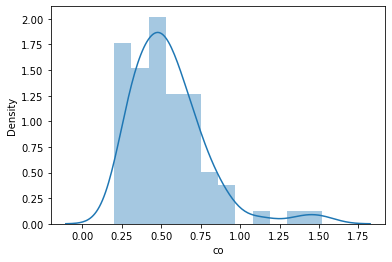

In [40]:
sns.distplot(data["co"])


<AxesSubplot:xlabel='benzene', ylabel='Density'>

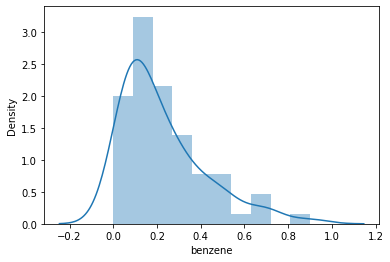

In [41]:
sns.distplot(data["benzene"])


<AxesSubplot:xlabel='AQI', ylabel='Density'>

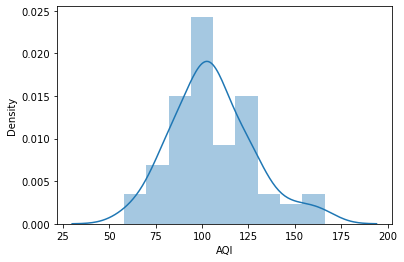

In [42]:
sns.distplot(data.AQI)


In [43]:
means = [
    data["pm10"].mean(),
    data["so2"].mean(),
    data["nox"].mean(),
    data["pm25"].mean(),
    data["ammonia"].mean(),
    data["o3"].mean(),
    data["co"].mean(),
    data["benzene"].mean(),
    data["AQI"].mean()
]
Mean = pd.Series(means).to_numpy()
Mean

array([109.39393939,  16.65070423,  30.17142857,  46.72222222,
        23.99722222,  27.79027778,   0.54972222,   0.225     ,
       105.57164179])

In [57]:
medians = [
    data["pm10"].median(),
    data["so2"].median(),
    data["nox"].median(),
    data["pm25"].median(),
    data["ammonia"].median(),
    data["o3"].median(),
    data["co"].median(),
    data["benzene"].median(),
    data["AQI"].median()
]

Median = pd.Series(medians).to_numpy()
Median


array([105.5 ,  14.1 ,  29.75,  47.  ,  23.  ,  20.75,   0.5 ,   0.2 ,
       104.5 ])

In [55]:
current =data.loc[data["month"]==12]
current= data.iloc[-1]
current


month       12.00
pm10        88.00
so2         13.00
nox         34.50
pm25        72.00
ammonia     15.00
o3          16.50
co           1.39
benzene      0.04
AQI        162.00
Name: 2022, dtype: float64

### Summary of the insights 

**Air Quality Analysis Summary:**

Below is a concise evaluation of the current air quality for each parameter, along with comparisons to the mean and median values. It is essential to consider these findings to better understand the potential health risks associated with the present air quality levels.

---

**PM 10 (Particulate Matter 10):**

The current value of 88 μg/m³ indicates relatively better air quality compared to the mean (110.9) and median (104.5) values. However, it still exceeds the WHO's guideline of 50 μg/m³ for 24-hour exposure, suggesting potential health risks.

**SO2 (Sulfur Dioxide):**

The current value of 13 μg/m³ suggests relatively lower concentrations of SO2 compared to the mean (16.8) and median (14.1) values, indicating better air quality within acceptable limits.

**NOx (Nitrogen Oxides):**

The current value of 34.5 μg/m³ is higher than the mean (30.2) and median (29.8), indicating relatively higher NOx levels and potentially poorer air quality.

**PM 2.5 (Particulate Matter 2.5):**

The current value of 72 μg/m³ exceeds both the mean (46.7) and median (47), indicating worse air quality with elevated levels of PM 2.5, exceeding the WHO's guideline of 25 μg/m³ for 24-hour exposure.

**Ammonia:**

The current value of 15 μg/m³ suggests relatively lower concentrations compared to the mean (24) and median (23), but without specific threshold limits, a comprehensive evaluation of air quality related to ammonia is challenging.

**O3 (Ozone):**

The current value of 16.5 μg/m³ is lower than the mean (27.8) and median (20.75), indicating relatively better air quality regarding O3 levels. However, further context and threshold limits are necessary for a comprehensive assessment.

**CO (Carbon Monoxide):**

The current value of 1.39 mg/m³ exceeds the mean (0.5497) and median (0.5), indicating higher CO levels and potentially poorer air quality. However, it is important to note that the current value is significantly lower than the WHO's guideline of 10 mg/m³ for 8-hour exposure, indicating that the air quality related to CO is within acceptable limits according to the WHO's standards.

**Benzene:**

The current value of 0.04 μg/m³ suggests relatively lower concentrations compared to the mean (0.225) and median (0.2). However, without specific threshold limits, evaluating the air quality related to benzene accurately is challenging.

**AQI (Air Quality Index):**

The current value of 162 is higher than the mean (106.2) and median (103.8), indicating poorer overall air quality and a greater risk to human health due to the combined effects of multiple pollutants.

---


##   Categorical features analysis


# Correlational Analysis

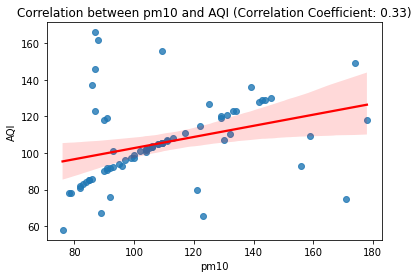

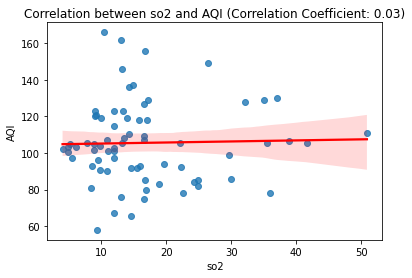

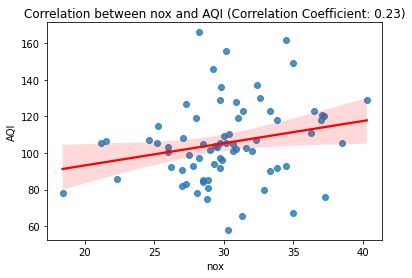

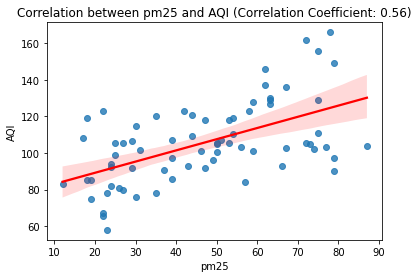

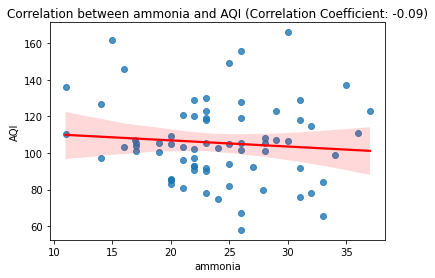

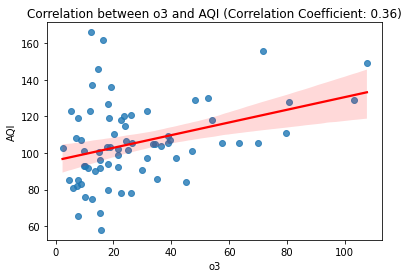

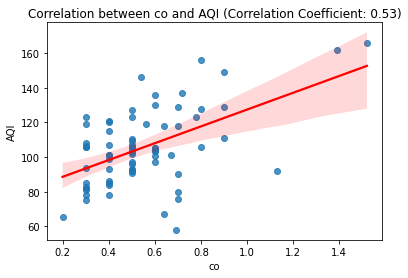

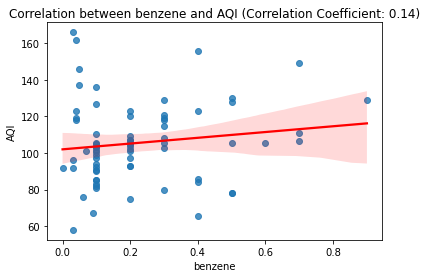

In [59]:
for col in data.columns:
    if col != 'AQI' and  col!="month":
        sns.regplot(x=col, y='AQI', data=data,line_kws = {'color':'red'})
        c = data['AQI'].corr(data[col])
        plt.title(f'Correlation between {col} and AQI (Correlation Coefficient: {c:.2f})')
        plt.xlabel(col)
        plt.ylabel('AQI')
        plt.show()

    


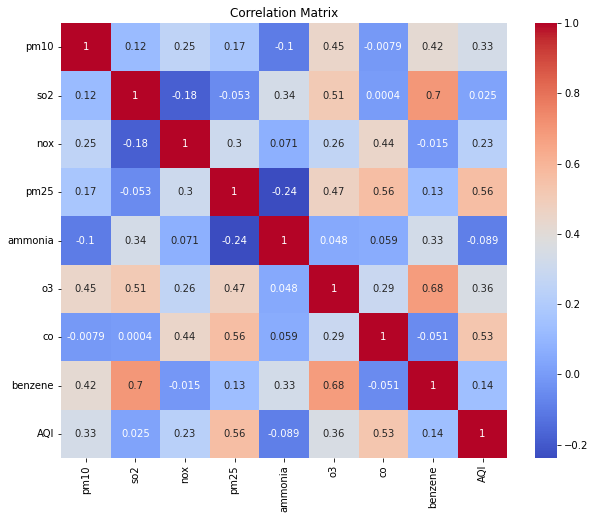

In [61]:
d=data.drop("month",axis=1)
correlation_matrix = d.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

### Summary of the insights:

1. **PM 10:** Moderate positive correlation (0.33) with AQI. Higher levels contribute to poorer air quality.





2. **SO2:** Weak positive correlation (0.025) with AQI. Limited impact on air quality.




3. **NOx:** Moderate positive correlation (0.23) with AQI. Higher levels indicate poorer air quality.




4. **PM 2.5:** Strong positive correlation (0.56) with AQI. Higher concentrations result in increased AQI values and potential health risks.




5. **Ammonia:** Weak negative correlation (-0.089) with AQI. Limited association with air quality.




6. **O3:** Moderate positive correlation (0.36) with AQI. Higher levels contribute to increased AQI values and potentially poorer air quality.




7. **CO:** Moderate positive correlation (0.53) with AQI. Elevated concentrations indicate poorer air quality.




8. **Benzene:** Weak positive correlation (0.14) with AQI. Limited impact, but can contribute to higher AQI values.



These concise insights highlight the correlations between pollutants and AQI, emphasizing the significant impact of PM 2.5 and CO, while noting the limited influence of SO2, ammonia, and benzene on overall air quality.


## Analysis of Air Pollutants and Air Quality Index (AQI) over Time


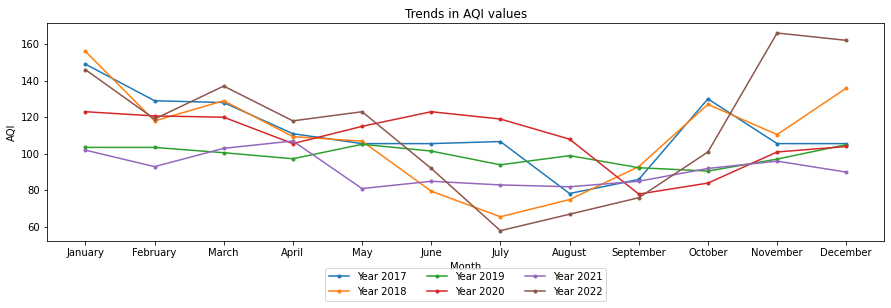

In [49]:
import matplotlib.pyplot as plt

x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
y_ = data.iloc[:, -1].values
y = np.array_split(y_, 6)

plt.figure().set_figwidth(15)

plt.xlabel("Month")
plt.ylabel("AQI")

for i in range(0, 6):
    plt.plot(x, y[i], label=f"Year {2017+i}",marker=".")

plt.title("Trends in AQI values")    
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.show()

    
